In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def func(x,m,p0,p1,p2,p3,p4,p5,p00,p10,p20,p30,p40,p50):
    first=np.where(x <= m, 1, 0)
    second=np.where(x > m, 1, 0)
    return (p0+p1/(1+np.exp(p2*p3-p2*x))-p1/(1+np.exp(p4*p5-p4*x)))*first\
        +(p00+p10/(1+np.exp(p20*p30-p20*x))-p10/(1+np.exp(p40*p50-p40*x)))*second

In [3]:
np.set_printoptions(suppress=True)

df = pd.read_csv(r'D:\Desktop\ee-chart1.csv',header=0,names=['name', 'value'])
xData=df.name
yData=df.value
Parameters, pcov = curve_fit(func, xData, yData,\
                p0=[150,10,40,0.05,50,0.06,180,10,40,0.05,180,0.06,300],maxfev=100000000)
#,method='trf', maxfev=1000000)
# Parameters, pcov = curve_fit(func, xData, yData, bounds=([0,0,0,0,0,0], [70,70,0.5,365,0.5,365]),maxfev=100000000)
print(Parameters)

[150.           2.6649655  -19.22407043   0.20434677 151.59032347
   0.03790087 126.19111878   2.79842377  21.74987412   0.03854971
 182.73614723   0.06096243 262.35706897]


D:\Miniconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


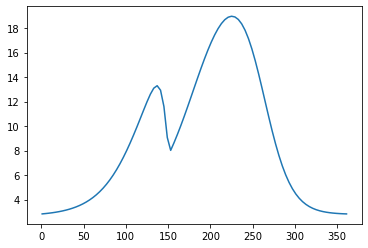

In [4]:
x=np.arange(1, 365,4)
m,p0,p1,p2,p3,p4,p5,p00,p10,p20,p30,p40,p50=Parameters
y=func(x,m,p0,p1,p2,p3,p4,p5,p00,p10,p20,p30,p40,p50)
plt.plot(x,y)
plt.show()